# **1. 손글씨 인식 모델 만들기**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
digits = load_digits()

X_data = digits['data']
y_data = digits['target']

print(X_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


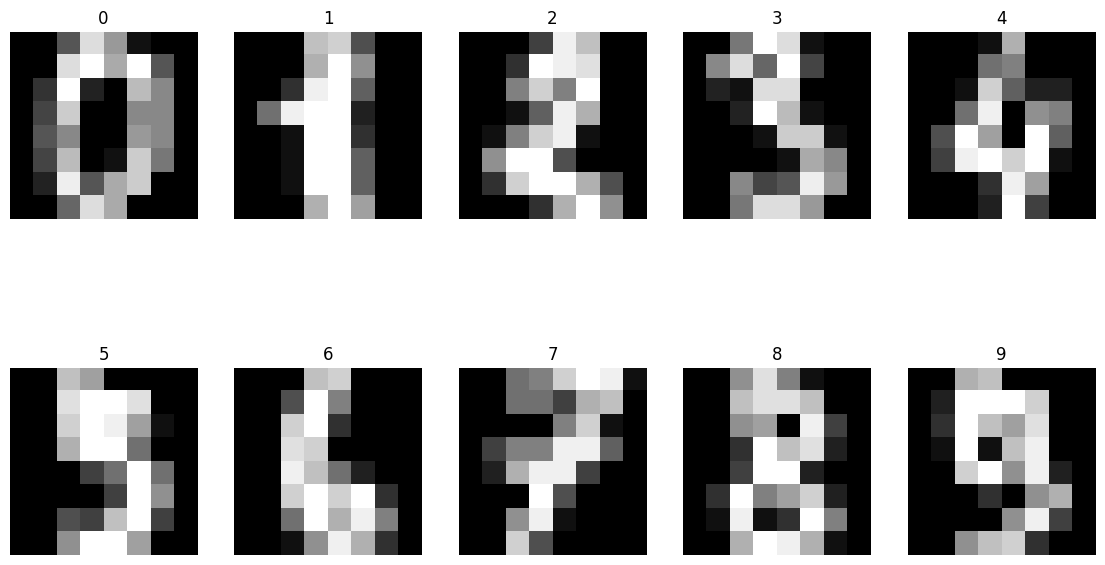

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
  ax.set_title(y_data[i])
  ax.axis('off')

In [8]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=49)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# **2. 데이터 로더**
- 데이터의 양이 많을 때 배치 단위로 학습하는 방법

<img src='https://i.imgur.com/t83RUtL.png' width='700'>

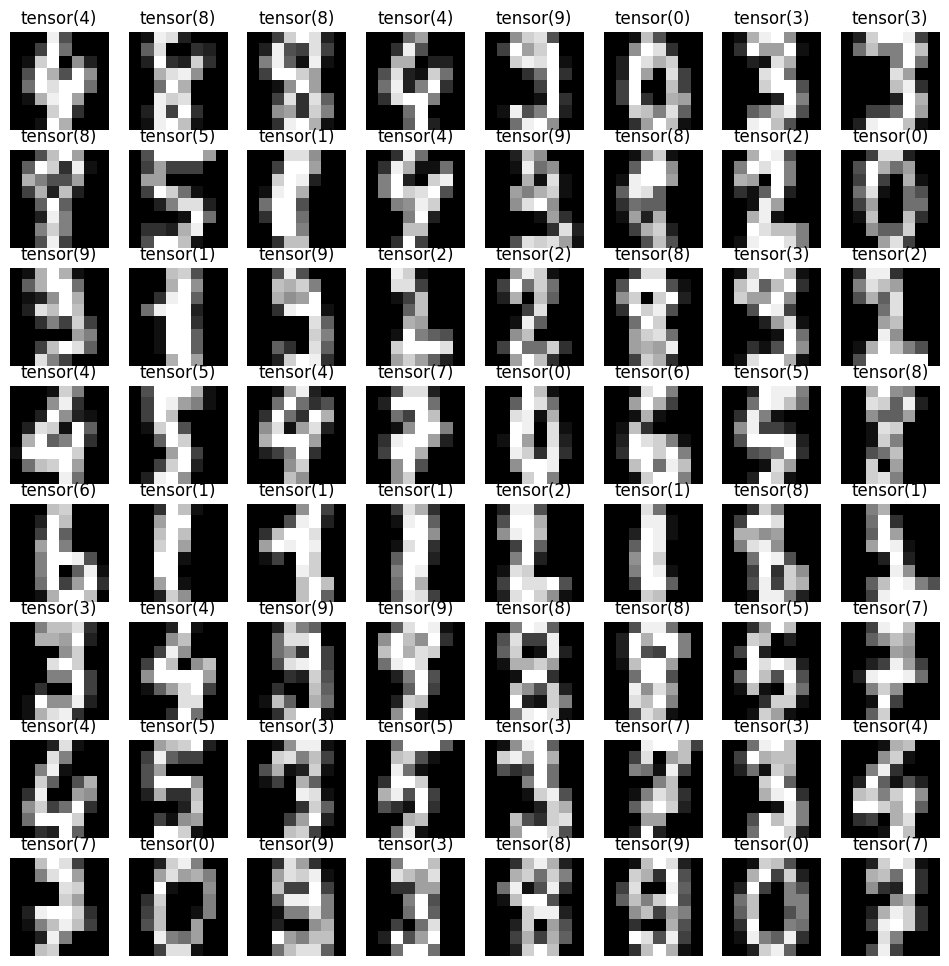

In [20]:
loader = torch.utils.data.DataLoader(
  dataset = list(zip(X_train, y_train)),
  batch_size = 64,
  shuffle = True
)

# iter 함수를 쓰면 데이터를 차례대로 나열해준다.
# next 는 하나씩 가져온다.
imgs, labels = next(iter(loader))

# 배치 사이즈 만큼 가지고 오는 것 확인!
# print(len(labels))

# loader 객체 자체도 반복문은 돌릴 수 있다.
# loader 객체 만들 때 정해준 배치 사이즈 만큼 하나씩 들고 온다.
# for x, y in loader:
#   print(x)
#   print(y)

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(12, 12))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.reshape((8, 8)), cmap='gray')
  ax.set_title(label)
  ax.axis('off')

In [23]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr = 0.01)

epochs = 50

for epoch in range(epochs + 1):
  # 총 loss와 acc를 저장할 변수
  sum_losses = 0
  sum_accs = 0

  for X_batch, y_batch in loader:
    y_pred = model(X_batch)
    loss = nn.CrossEntropyLoss()(y_pred, y_batch)

    optimizer.zero_grad() # 초기화
    loss.backward() # 역전파
    optimizer.step() # 기울기 업데이트

    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)

    sum_losses += loss
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

    sum_accs += acc

  # 전체 평균
  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)

  print(f'Epoch: {epoch}/{epochs} Loss : {avg_loss : .4f} Accuracy:{avg_acc:.2f}%')

Epoch: 0/50 Loss :  1.8400 Accuracy:55.94%
Epoch: 1/50 Loss :  0.3198 Accuracy:89.93%
Epoch: 2/50 Loss :  0.1752 Accuracy:94.74%
Epoch: 3/50 Loss :  0.1230 Accuracy:96.33%
Epoch: 4/50 Loss :  0.1132 Accuracy:96.20%
Epoch: 5/50 Loss :  0.1045 Accuracy:96.66%
Epoch: 6/50 Loss :  0.0895 Accuracy:97.28%
Epoch: 7/50 Loss :  0.0756 Accuracy:98.30%
Epoch: 8/50 Loss :  0.0728 Accuracy:98.02%
Epoch: 9/50 Loss :  0.0639 Accuracy:98.29%
Epoch: 10/50 Loss :  0.0496 Accuracy:98.98%
Epoch: 11/50 Loss :  0.0478 Accuracy:98.91%
Epoch: 12/50 Loss :  0.0510 Accuracy:98.90%
Epoch: 13/50 Loss :  0.0443 Accuracy:99.17%
Epoch: 14/50 Loss :  0.0361 Accuracy:99.46%
Epoch: 15/50 Loss :  0.0336 Accuracy:99.46%
Epoch: 16/50 Loss :  0.0300 Accuracy:99.66%
Epoch: 17/50 Loss :  0.0343 Accuracy:99.37%
Epoch: 18/50 Loss :  0.0398 Accuracy:98.85%
Epoch: 19/50 Loss :  0.0301 Accuracy:99.59%
Epoch: 20/50 Loss :  0.0245 Accuracy:99.66%
Epoch: 21/50 Loss :  0.0222 Accuracy:99.73%
Epoch: 22/50 Loss :  0.0235 Accuracy:99.37

tensor(7)


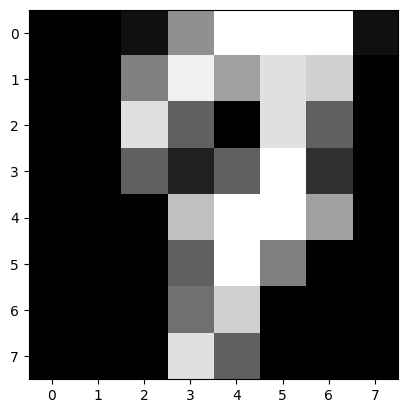

In [24]:
plt.imshow(X_test[9].reshape((8, 8)), cmap = 'gray')
print(y_test[9])

In [25]:
# 과연, 7로 예측을 했을까?
y_pred = model(X_test)
y_pred[9]

tensor([-10.1250,  -3.8476, -16.1619,  -1.1241,  -3.6396,  -0.1822, -10.4719,
         13.7287,  -8.5375,   1.9989], grad_fn=<SelectBackward0>)

In [26]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[9]

tensor([4.3698e-11, 2.3263e-08, 1.0439e-13, 3.5438e-07, 2.8645e-08, 9.0900e-07,
        3.0888e-11, 9.9999e-01, 2.1374e-10, 8.0497e-06],
       grad_fn=<SelectBackward0>)

In [27]:
for i in range(10):
  print(f'숫자 {i}일 확률: {y_prob[9][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [28]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다!')

테스트 정확도는 95.83% 입니다!
